In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,movie_title,title_year,duration,color,genre,language,country,content_rating,director_name,...,budget,gross,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,num_critic_for_reviews,IMDB_user_votes,IMDB_user_reviews,IMDB_score
0,0,Dinosaur,2000,82.0,Color,Adventure,English,USA,PG,Eric Leighton,...,127500000.0,137748063.0,0,1000.0,558.0,0,145.0,38438.0,241.0,6.5
1,1,How the Grinch Stole Christmas,2000,110.0,Color,Comedy,English,USA,PG,Ron Howard,...,123000000.0,260031035.0,2000,1000.0,722.0,0,175.0,141414.0,482.0,6.0
2,2,Mission: Impossible II,2000,123.0,Color,Action,English,USA,PG-13,John Woo,...,125000000.0,215397307.0,610,10000.0,794.0,0,237.0,242188.0,1426.0,6.1
3,3,The Perfect Storm,2000,130.0,Color,Action,English,USA,PG-13,Wolfgang Petersen,...,140000000.0,182618434.0,249,784.0,638.0,0,231.0,133076.0,779.0,6.4
4,4,The Patriot,2000,142.0,Color,Action,English,USA,R,Roland Emmerich,...,110000000.0,113330342.0,776,13000.0,2000.0,4000,192.0,207613.0,1144.0,7.1


In [4]:
#Getting rid of that Unnamed column
df = df.drop(df.columns[0], axis = 1)
df.head()

,movie_title,title_year,duration,color,genre,language,country,content_rating,director_name,actor_1_name,...,budget,gross,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,num_critic_for_reviews,IMDB_user_votes,IMDB_user_reviews,IMDB_score
0,Dinosaur,2000,82.0,Color,Adventure,English,USA,PG,Eric Leighton,Alfre Woodard,...,127500000.0,137748063.0,0,1000.0,558.0,0,145.0,38438.0,241.0,6.5
1,How the Grinch Stole Christmas,2000,110.0,Color,Comedy,English,USA,PG,Ron Howard,Clint Howard,...,123000000.0,260031035.0,2000,1000.0,722.0,0,175.0,141414.0,482.0,6.0
2,Mission: Impossible II,2000,123.0,Color,Action,English,USA,PG-13,John Woo,Tom Cruise,...,125000000.0,215397307.0,610,10000.0,794.0,0,237.0,242188.0,1426.0,6.1
3,The Perfect Storm,2000,130.0,Color,Action,English,USA,PG-13,Wolfgang Petersen,Karen Allen,...,140000000.0,182618434.0,249,784.0,638.0,0,231.0,133076.0,779.0,6.4
4,The Patriot,2000,142.0,Color,Action,English,USA,R,Roland Emmerich,Heath Ledger,...,110000000.0,113330342.0,776,13000.0,2000.0,4000,192.0,207613.0,1144.0,7.1


# Deciding to drop more columns

As much as we know how the cast and the director play a role in a movie's final ratings, we cannot do it right now because of the sheer complexity in the different names that could come as values. Hence we drop these columns before passing the dataframe to our model.

In [5]:
df = df.drop(['movie_title','director_name','actor_1_name', 'actor_2_name'], axis = 1)
df.head()

,title_year,duration,color,genre,language,country,content_rating,budget,gross,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,num_critic_for_reviews,IMDB_user_votes,IMDB_user_reviews,IMDB_score
0,2000,82.0,Color,Adventure,English,USA,PG,127500000.0,137748063.0,0,1000.0,558.0,0,145.0,38438.0,241.0,6.5
1,2000,110.0,Color,Comedy,English,USA,PG,123000000.0,260031035.0,2000,1000.0,722.0,0,175.0,141414.0,482.0,6.0
2,2000,123.0,Color,Action,English,USA,PG-13,125000000.0,215397307.0,610,10000.0,794.0,0,237.0,242188.0,1426.0,6.1
3,2000,130.0,Color,Action,English,USA,PG-13,140000000.0,182618434.0,249,784.0,638.0,0,231.0,133076.0,779.0,6.4
4,2000,142.0,Color,Action,English,USA,R,110000000.0,113330342.0,776,13000.0,2000.0,4000,192.0,207613.0,1144.0,7.1


# Introduction to Dummy Variables

## Quantitative Variables

Variables with magnitudes that can be placed in a meaningful order with consistent intervals. Operations such as addition and multiplication can be done on these

Eg: "Profit","Revenue", "Year"

## Categorical Variables

Names, or labels with no logical order or with a logical order but inconsistent differences between groups. Operations cannot be done on these

Eg: "Type","Location"



## Points to Ponder

    * Zipcode. What variable type would you assign it?
    * "Quarters in a Financial Year. What variable type would you assign it?
    

Models don't understand categorical variables. They need solid numbers to plug in to "learn" their data. This is where dummy variables come in. Dummy Variables assign numerical values to categorical Variables.


Take in the case of a categorical variable "Country" in a dataset which can take the values "USA","Japan" and "Italy".

Adding Dummy Columns will create three columns to replace "Country": "Country_USA", "Country_Japan" and "Country_Italy"

A row which had a value "USA" for country will have values 1,0,0 for "Country_USA", "Country_Japan" and "Country_Italy"

A row which had a value "Italy" for country will have values 0,0,1 for "Country_USA", "Country_Japan" and "Country_Italy"

A row which had a value "Japan" for country will have values 0,1,0 for "Country_USA", "Country_Japan" and "Country_Italy"

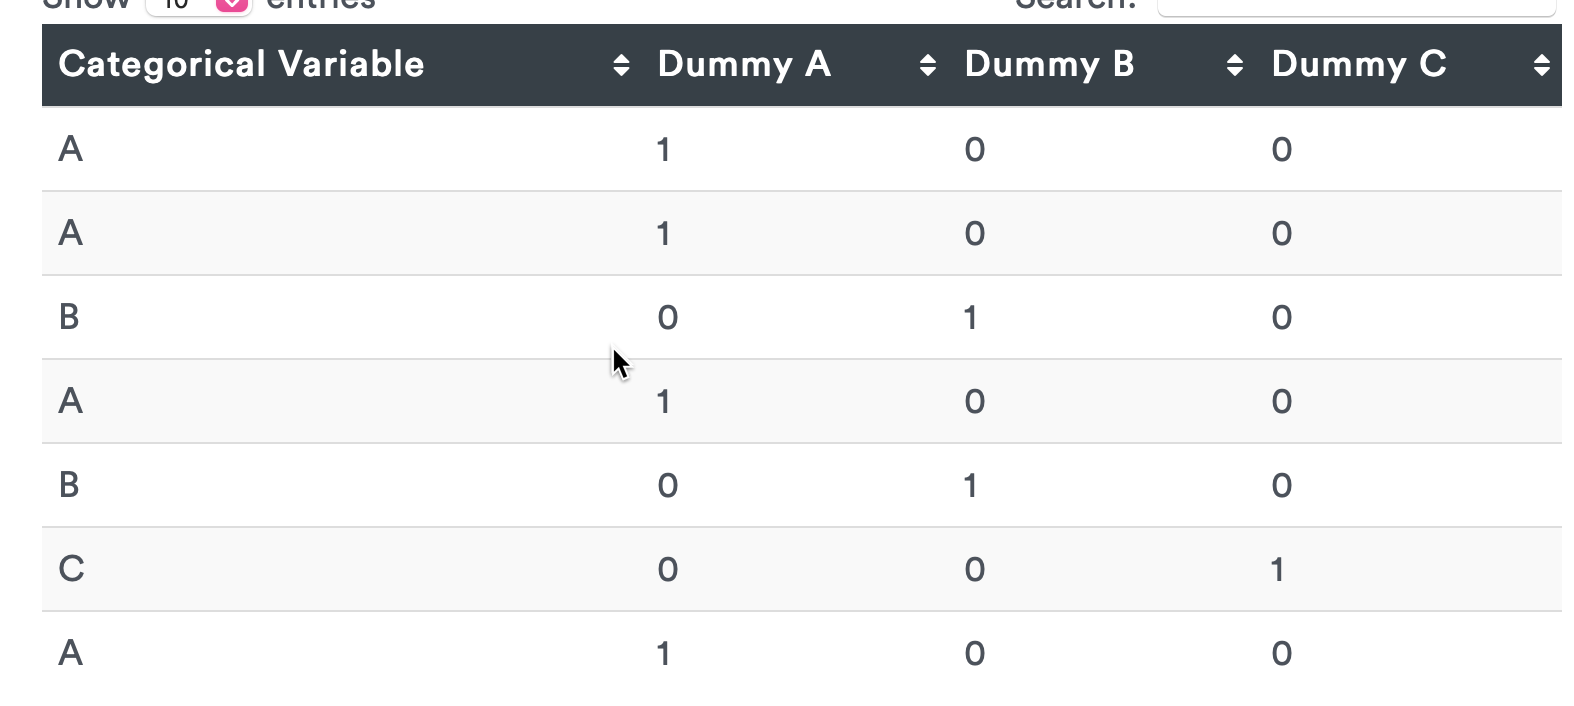


In [6]:
df = pd.get_dummies(df,prefix_sep = '_', columns = None)
df

,title_year,duration,budget,gross,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,num_critic_for_reviews,IMDB_user_votes,...,country_United Arab Emirates,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated
0,2000,82.0,127500000.0,137748063.0,0,1000.0,558.0,0,145.0,38438.0,...,0,0,0,1,0,0,0,0,0,0
1,2000,110.0,123000000.0,260031035.0,2000,1000.0,722.0,0,175.0,141414.0,...,0,0,0,1,0,0,0,0,0,0
2,2000,123.0,125000000.0,215397307.0,610,10000.0,794.0,0,237.0,242188.0,...,0,0,0,0,1,0,0,0,0,0
3,2000,130.0,140000000.0,182618434.0,249,784.0,638.0,0,231.0,133076.0,...,0,0,0,0,1,0,0,0,0,0
4,2000,142.0,110000000.0,113330342.0,776,13000.0,2000.0,4000,192.0,207613.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,2014,97.0,4000000.0,23472900.0,18,852.0,680.0,10000,161.0,48236.0,...,0,0,0,0,1,0,0,0,0,0
3261,2014,81.0,50000.0,23472900.0,3,26.0,20.0,83,7.0,66.0,...,0,0,0,0,0,0,0,0,0,1
3262,2014,95.0,75000.0,23472900.0,0,883.0,507.0,87,3.0,34.0,...,0,0,0,0,0,0,0,0,0,1
3263,2014,109.0,35000000.0,10499968.0,453,1000.0,206.0,10000,233.0,47502.0,...,0,0,0,0,0,1,0,0,0,0


# Creating X and y Variables

I like to think of this next section as an exam. Whenever you create a test, you make sure that you have the answer key with you and you don't pass it on to the students along with the question paper. 

This next section strips the answers (IMDB_score) and stores it an answer key (y). The questions(all other columns) are stored as the question paper (X)

In [7]:
X = df.loc[:,df.columns != 'IMDB_score']
y = df.iloc[:,df.columns == 'IMDB_score']

In [8]:
X

,title_year,duration,budget,gross,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,num_critic_for_reviews,IMDB_user_votes,...,country_United Arab Emirates,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated
0,2000,82.0,127500000.0,137748063.0,0,1000.0,558.0,0,145.0,38438.0,...,0,0,0,1,0,0,0,0,0,0
1,2000,110.0,123000000.0,260031035.0,2000,1000.0,722.0,0,175.0,141414.0,...,0,0,0,1,0,0,0,0,0,0
2,2000,123.0,125000000.0,215397307.0,610,10000.0,794.0,0,237.0,242188.0,...,0,0,0,0,1,0,0,0,0,0
3,2000,130.0,140000000.0,182618434.0,249,784.0,638.0,0,231.0,133076.0,...,0,0,0,0,1,0,0,0,0,0
4,2000,142.0,110000000.0,113330342.0,776,13000.0,2000.0,4000,192.0,207613.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,2014,97.0,4000000.0,23472900.0,18,852.0,680.0,10000,161.0,48236.0,...,0,0,0,0,1,0,0,0,0,0
3261,2014,81.0,50000.0,23472900.0,3,26.0,20.0,83,7.0,66.0,...,0,0,0,0,0,0,0,0,0,1
3262,2014,95.0,75000.0,23472900.0,0,883.0,507.0,87,3.0,34.0,...,0,0,0,0,0,0,0,0,0,1
3263,2014,109.0,35000000.0,10499968.0,453,1000.0,206.0,10000,233.0,47502.0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
y

,IMDB_score
0,6.5
1,6.0
2,6.1
3,6.4
4,7.1
...,...
3260,6.1
3261,7.4
3262,5.0
3263,5.7


# Understanding Train-test split

Going to the example of the exams again. If you were a professor and was designing an exam plan for your class which contained the following:
    * Test 1
    * Midterm
    * Test 2 
    * Finals
    
How would you plan the Final exam questions? Would you give a question paper that only contained a subset of the questions asked for the previous three exams? Obviously not! You know the students would just memorize the answers to the questions and get a high grade on the finals (if they catch your pattern that is).

The same can be said for models. If you give all your data to the models to learn on, they will adjust accordingly to the point where they try too hard to get the results that you gave them. This means that while they will do well on that specific data, giving them any outside data will lead to results that are wildly incorrect. This is called overfitting (because the model fits too much onto the data you gave it to learn on).


So just as how things happen in real life, we set aside certain number of rows selected at random and then pass the rest to the model to learn on (train). We then test the model on this unseen data and report the accuracy of the model on this unseen data.

Rememeber: Always remember to have a test dataset to test your model on.



In [30]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 87) 

In [31]:
model = LinearRegression()
model = model.fit(X_train,y_train)

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred = y_pred.round(decimals = 1)
y_pred

array([[ 7.3],
       [ 6.3],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 9.1],
       [ 6.4],
       [ 7.4],
       [ 6.6],
       [ 5.4],
       [ 5.3],
       [ 6.2],
       [ 5.7],
       [ 5.6],
       [ 9.5],
       [ 6.6],
       [ 6.3],
       [ 5.8],
       [ 5.6],
       [ 6.3],
       [ 5.8],
       [ 5.5],
       [ 6.6],
       [ 6.9],
       [ 7.6],
       [ 6.7],
       [ 6. ],
       [ 6.9],
       [ 5.2],
       [ 6.1],
       [ 6.2],
       [ 6.4],
       [ 6.5],
       [ 5.8],
       [ 5. ],
       [ 5.9],
       [ 6. ],
       [ 5.8],
       [ 5.2],
       [ 5.2],
       [ 6.7],
       [ 7.5],
       [ 6.1],
       [ 6.2],
       [ 5.9],
       [ 5.7],
       [ 6.8],
       [ 6.3],
       [ 6.7],
       [ 6.8],
       [ 6.5],
       [ 6.1],
       [ 5.8],
       [ 5.9],
       [ 7.4],
       [ 7.5],
       [ 6.7],
       [ 8. ],
       [ 5.7],
       [ 5.6],
       [ 5. ],
       [ 6.9],
       [ 6.7],
       [ 5.6],
       [ 5.5],
       [ 7.9],
       [ 6

In [34]:
#Making it into a neat DataFrame
y_pred = pd.DataFrame(y_pred,columns = ['predictions'])
y_pred

,predictions
0,7.3
1,6.3
2,6.0
3,6.1
4,6.9
...,...
975,4.5
976,5.7
977,7.4
978,5.5


In [35]:
y_test

,IMDB_score
1401,7.4
3160,5.3
1063,4.1
1890,6.4
319,6.9
...,...
2231,3.6
2170,3.8
1663,7.3
2323,4.3


In [36]:
#Notice the indexing is off for y_test. Resetting it

y_test = y_test.reset_index()
y_test

,index,IMDB_score
0,1401,7.4
1,3160,5.3
2,1063,4.1
3,1890,6.4
4,319,6.9
...,...,...
975,2231,3.6
976,2170,3.8
977,1663,7.3
978,2323,4.3


In [37]:
#Dropping the index column containing the previous index
y_test = y_test.drop(["index"], axis = 1)

In [40]:
y_test['prediction'] = y_pred
y_test

,IMDB_score,prediction
0,7.4,7.3
1,5.3,6.3
2,4.1,6.0
3,6.4,6.1
4,6.9,6.9
...,...,...
975,3.6,4.5
976,3.8,5.7
977,7.3,7.4
978,4.3,5.5


In [41]:
y_test['score'] = np.where(y_test['IMDB_score'] == y_test['prediction'], 1, 0)
    

In [42]:
y_test['score'].sum()/len(y_test)

0.06428571428571428

A 6% accuracy? Clearly our model sucks! But before we take things apart, let's take a closer look at our predictions.

In [44]:
y_test

,IMDB_score,prediction,score
0,7.4,7.3,0
1,5.3,6.3,0
2,4.1,6.0,0
3,6.4,6.1,0
4,6.9,6.9,1
...,...,...,...
975,3.6,4.5,0
976,3.8,5.7,0
977,7.3,7.4,0
978,4.3,5.5,0


It seems that the decimal scores are really throwing us off

In [45]:
y_test['IMDB_score'] = y_test['IMDB_score'].round(decimals = 0) #Rounding them to whole numbers
y_test['prediction'] = y_test['prediction'].round(decimals = 0)
y_test['score'] = np.where(y_test['IMDB_score'] == y_test['prediction'], 1, 0)

In [46]:
y_test

,IMDB_score,prediction,score
0,7.0,7.0,1
1,5.0,6.0,0
2,4.0,6.0,0
3,6.0,6.0,1
4,7.0,7.0,1
...,...,...,...
975,4.0,4.0,1
976,4.0,6.0,0
977,7.0,7.0,1
978,4.0,6.0,0


In [47]:
y_test['score'].sum()/len(y_test)

0.5112244897959184

Now the accuracy is up to 51%. You must be thinking, well that's bad too. A 50% chance of getting it right means plain guesswork. Before we jump into conclusions, let's think about a couple of things:

    * Notice we took out a lot of variables before feeding the data into the model, playing around with more or less number of columns can lead to a higher score
    * Our model is a simple Linear Regression. More complex models do exist which might do a better job. However it is beyond the scope of this project (Notice I said "might". Sometimes complex models can do a worse job than simpler models, so always start with simpler models and set that as your benchmark. Sometimes more complex models might give you minute gains, at the expense of higher compute requirements and processing time)
    * If you were to give a random score for a movie, the probability of you getting it right is 1/10 = 0.1, which is far less than 0.5. You get an F in probability! 